In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D,Flatten # Layers to be used for building our model
from tensorflow.keras.models import Model, Sequential # The class used to create a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Load Data

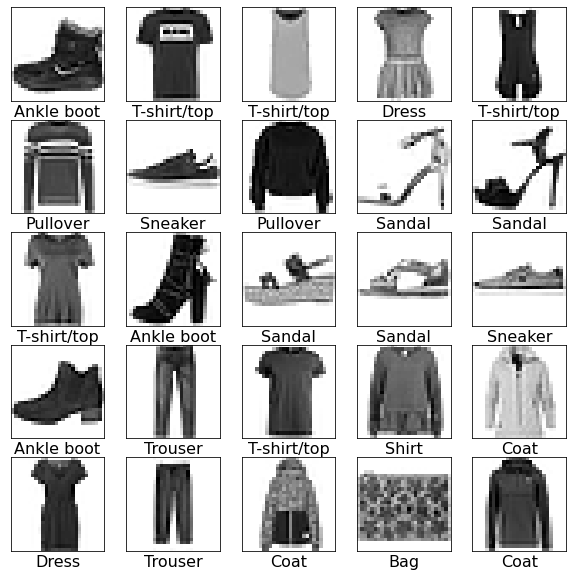

In [26]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names={ 0: 'T-shirt/top',
              1: 'Trouser',
              2: 'Pullover',
              3: 'Dress',
              4: 'Coat',
              5: 'Sandal',
              6: 'Shirt',
              7: 'Sneaker',
              8: 'Bag',
              9: 'Ankle boot' }

plt.figure(figsize=(10,10))
for i in range(25):
   plt.subplot(5,5,i+1)
   plt.xticks([])
   plt.yticks([])
   plt.imshow(train_images[i], cmap=plt.cm.binary)
   plt.xlabel(class_names[train_labels[i]])
plt.show()

# Data Preparation

In [15]:
#Train/validation/test split

train_x, val_x, train_y, val_y = train_test_split(train_images, train_labels, stratify=train_labels, random_state=48, test_size=0.05)
(test_x, test_y)=(test_images, test_labels)

In [16]:
# normalize to range 0-1
train_x = train_x / 255.0
val_x = val_x / 255.0
test_x = test_x / 255.0

In [17]:
#one-hot encode

train_y = to_categorical(train_y)
val_y = to_categorical(val_y)
test_y = to_categorical(test_y)

In [18]:
print(train_x.shape)  #(57000, 28, 28)
print(train_y.shape)  #(57000, 10)
print(val_x.shape)    #(3000, 28, 28)
print(val_y.shape)    #(3000, 10)
print(test_x.shape)   #(10000, 28, 28)
print(test_y.shape)   #(10000, 10)

(57000, 28, 28)
(57000, 10)
(3000, 28, 28)
(3000, 10)
(10000, 28, 28)
(10000, 10)


# Train MLP model

In [19]:
model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=(28, 28)))
model_mlp.add(Dense(350, activation='relu'))
model_mlp.add(Dense(10, activation='softmax'))
print(model_mlp.summary())
model_mlp.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 350)               274750    
                                                                 
 dense_1 (Dense)             (None, 10)                3510      
                                                                 
Total params: 278,260
Trainable params: 278,260
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
early_stop=EarlyStopping(monitor='val_loss', restore_best_weights= True, patience=5, verbose=1)
callback = [early_stop]

history_mlp = model_mlp.fit(train_x, train_y, epochs=100, batch_size=32, validation_data=(val_x, val_y), callbacks=callback)

Epoch 1/100
1782/1782 [==============================] - 4s 2ms/step - loss: 0.4846 - accuracy: 0.8265 - val_loss: 0.4041 - val_accuracy: 0.8580
Epoch 2/100
1782/1782 [==============================] - 4s 2ms/step - loss: 0.3649 - accuracy: 0.8675 - val_loss: 0.3417 - val_accuracy: 0.8770
Epoch 3/100
1782/1782 [==============================] - 4s 2ms/step - loss: 0.3309 - accuracy: 0.8782 - val_loss: 0.3183 - val_accuracy: 0.8853
Epoch 4/100
1782/1782 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.8871 - val_loss: 0.3278 - val_accuracy: 0.8773
Epoch 5/100
1782/1782 [==============================] - 4s 2ms/step - loss: 0.2852 - accuracy: 0.8941 - val_loss: 0.3024 - val_accuracy: 0.8870
Epoch 6/100
1782/1782 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.8988 - val_loss: 0.3231 - val_accuracy: 0.8850
Epoch 7/100
1782/1782 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9042 - val_loss: 0.3074 - val_ac

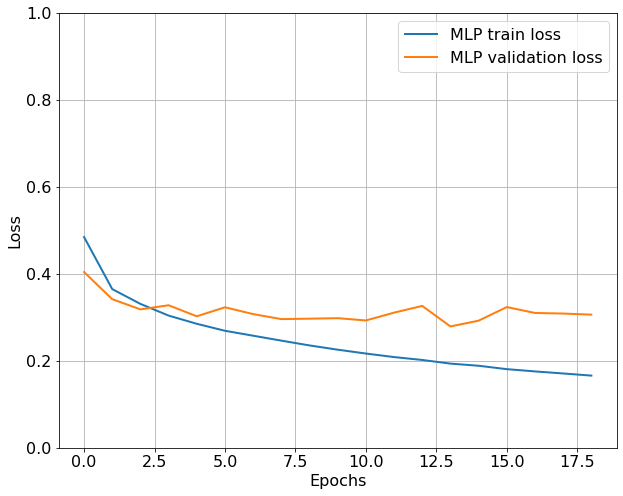

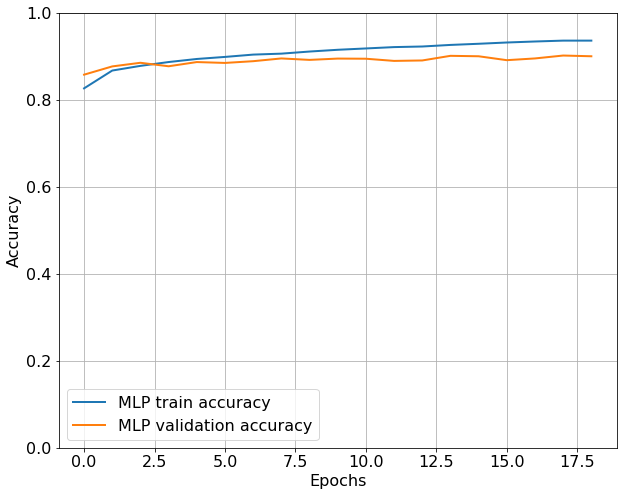

In [21]:
plot_history(hs={'MLP': history_mlp}, epochs=15, metric='loss')
plot_history( hs={'MLP': history_mlp}, epochs=15, metric='accuracy')

In [22]:
mlp_train_loss, mlp_train_acc = model_mlp.evaluate(train_x,  train_y, verbose=0)
print('\nTrain accuracy:', np.round(mlp_train_acc,3))
mlp_val_loss, mlp_val_acc = model_mlp.evaluate(val_x,  val_y, verbose=0)
print('\nValidation accuracy:', np.round(mlp_val_acc,3))
mlp_test_loss, mlp_test_acc = model_mlp.evaluate(test_x,  test_y, verbose=0)
print('\nTest accuracy:', np.round(mlp_test_acc,3))


Train accuracy: 0.937

Validation accuracy: 0.901

Test accuracy: 0.892


# Train CNN model

In [23]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
print(model_cnn.summary())
history_cnn= model_cnn.fit(train_x, train_y, epochs=100, batch_size=32, validation_data=(val_x, val_y), callbacks=callback)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

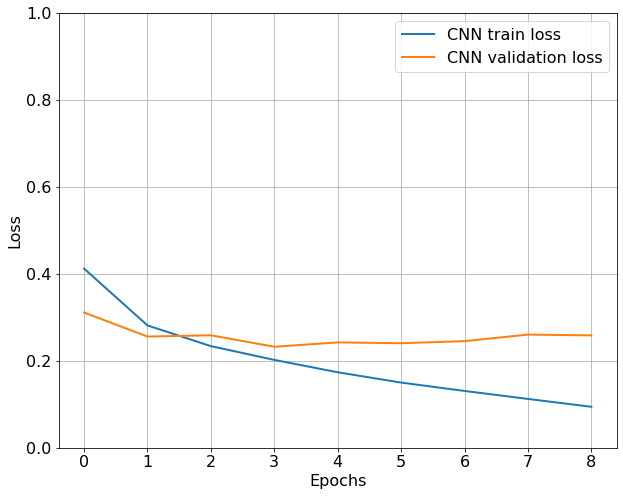

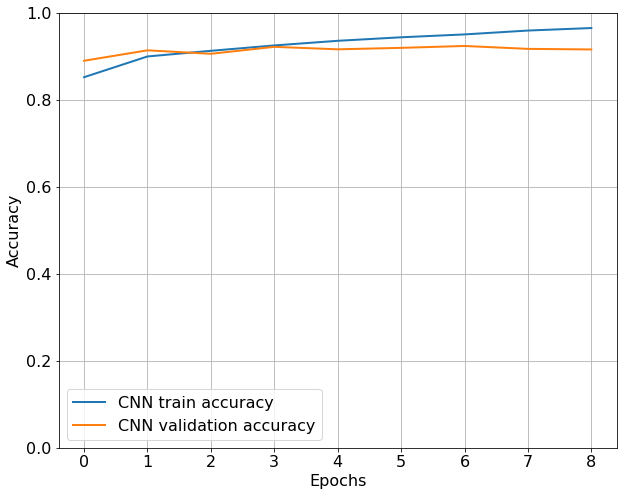

In [24]:
plot_history(hs={'CNN': history_cnn},epochs=10,metric='loss')
plot_history(hs={'CNN': history_cnn},epochs=10,metric='accuracy')

In [25]:
cnn_train_loss, cnn_train_acc = model_cnn.evaluate(train_x,  train_y, verbose=2)
print('\nTrain accuracy:', cnn_train_acc)
cnn_val_loss, cnn_val_acc = model_cnn.evaluate(val_x,  val_y, verbose=2)
print('\nValidation accuracy:', cnn_val_acc)
cnn_test_loss, cnn_test_acc = model_cnn.evaluate(test_x,  test_y, verbose=2)
print('\nTest accuracy:', cnn_test_acc)

1782/1782 - 6s - loss: 0.1634 - accuracy: 0.9419 - 6s/epoch - 3ms/step

Train accuracy: 0.941947340965271
94/94 - 0s - loss: 0.2323 - accuracy: 0.9220 - 307ms/epoch - 3ms/step

Validation accuracy: 0.921999990940094
313/313 - 1s - loss: 0.2524 - accuracy: 0.9100 - 1s/epoch - 3ms/step

Test accuracy: 0.9100000262260437
